In [1]:
#Colab Setup

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Colab Notebooks/fast.ai Lesson 3/'

!curl -s https://course.fast.ai/setup/colab | bash

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
Updating fastai...
Done.


In [14]:
#Colab Kaggle Setup

!pip install kaggle
!mkdir .kaggle
import json
token = {"username":"supermarkethobo","key":"3d5f49e13cef063dcabe8fbcef94ea57"}

with open('/content/.kaggle/kaggle.json', 'w') as file:
  json.dump(token, file)
  
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

import os
os.environ['KAGGLEUSERNAME'] = "supermarkethobo"
os.environ['KAGGLEKEY'] = "3d5f49e13cef063dcabe8fbcef94ea57"

mkdir: cannot create directory ‘.kaggle’: File exists


In [3]:
# check if .kaggle directory is made, sometimes it takes a while
!mkdir .kaggle

mkdir: cannot create directory ‘.kaggle’: File exists


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *

In [17]:
path = Config.data_path()/'pokemon'
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('/root/.fastai/data/pokemon')

In [18]:
! kaggle datasets download -h

usage: kaggle datasets download [-h] [-f FILE_NAME] [-p PATH] [-w] [--unzip]
                                [-o] [-q]
                                [dataset]

optional arguments:
  -h, --help            show this help message and exit
  dataset               Dataset URL suffix in format <owner>/<dataset-name> (use "kaggle datasets list" to show options)
  -f FILE_NAME, --file FILE_NAME
                        File name, all files downloaded if not provided
                        (use "kaggle datasets files -d <dataset>" to show options)
  -p PATH, --path PATH  Folder where file(s) will be downloaded, defaults to current working directory
  -w, --wp              Download files to current working path
  --unzip               Unzip the downloaded file. Will delete the zip file when completed.
  -o, --force           Skip check whether local version of file is up to date, force file download
  -q, --quiet           Suppress printing information about the upload/download progress


In [19]:
! kaggle datasets download vishalsubbiah/pokemon-images-and-types -p {path} --unzip

  0% 0.00/2.39M [00:00<?, ?B/s]
100% 2.39M/2.39M [00:00<00:00, 78.2MB/s]


In [20]:
path.ls()

[PosixPath('/root/.fastai/data/pokemon/pokemon.csv'),
 PosixPath('/root/.fastai/data/pokemon/images.zip')]

In [21]:
! unzip -h

UnZip 6.00 of 20 April 2009, by Debian. Original by Info-ZIP.

Usage: unzip [-Z] [-opts[modifiers]] file[.zip] [list] [-x xlist] [-d exdir]
  Default action is to extract files in list, except those in xlist, to exdir;
  file[.zip] may be a wildcard.  -Z => ZipInfo mode ("unzip -Z" for usage).

  -p  extract files to pipe, no messages     -l  list files (short format)
  -f  freshen existing files, create none    -t  test compressed archive data
  -u  update files, create if necessary      -z  display archive comment only
  -v  list verbosely/show version info       -T  timestamp archive to latest
  -x  exclude files that follow (in xlist)   -d  extract files into exdir
modifiers:
  -n  never overwrite existing files         -q  quiet mode (-qq => quieter)
  -o  overwrite files WITHOUT prompting      -a  auto-convert any text files
  -j  junk paths (do not make directories)   -aa treat ALL files as text
  -U  use escapes for all non-ASCII Unicode  -UU ignore any Unicode fields
  -C  mat

In [0]:
! unzip -n -q {path}/images.zip -d {path}

In [23]:
path.ls()

[PosixPath('/root/.fastai/data/pokemon/pokemon.csv'),
 PosixPath('/root/.fastai/data/pokemon/__MACOSX'),
 PosixPath('/root/.fastai/data/pokemon/images.zip'),
 PosixPath('/root/.fastai/data/pokemon/images')]

In [24]:
(path/'images').ls()[:10]

[PosixPath('/root/.fastai/data/pokemon/images/mawile.png'),
 PosixPath('/root/.fastai/data/pokemon/images/pignite.png'),
 PosixPath('/root/.fastai/data/pokemon/images/shellder.png'),
 PosixPath('/root/.fastai/data/pokemon/images/weavile.png'),
 PosixPath('/root/.fastai/data/pokemon/images/remoraid.png'),
 PosixPath('/root/.fastai/data/pokemon/images/armaldo.png'),
 PosixPath('/root/.fastai/data/pokemon/images/gothorita.png'),
 PosixPath('/root/.fastai/data/pokemon/images/kadabra.png'),
 PosixPath('/root/.fastai/data/pokemon/images/dewgong.png'),
 PosixPath('/root/.fastai/data/pokemon/images/toxicroak.png')]

In [25]:
fnames = get_image_files(path/'images')

for index, value in enumerate(fnames):
  file_path = str(value)
  fnames[index] = file_path[file_path.rfind('/')+1:]
                             
fnames[:10]

['mawile.png',
 'pignite.png',
 'shellder.png',
 'weavile.png',
 'remoraid.png',
 'armaldo.png',
 'gothorita.png',
 'kadabra.png',
 'dewgong.png',
 'toxicroak.png']

In [26]:
df = pd.read_csv(path/'pokemon.csv')

df.fillna(value='', axis=1, inplace=True)

df['labels'] = df['Type1'] + ' ' + df['Type2']
df = df.drop(columns=['Type1', 'Type2'])

df['labels'] = [tag.strip() for tag in df['labels']]


df.head()

,Name,labels
0,bulbasaur,Grass Poison
1,ivysaur,Grass Poison
2,venusaur,Grass Poison
3,charmander,Fire
4,charmeleon,Fire


Problem 1: There are multiple different image formats

Problem 2 : The images folder is not in the same order as the .csv

In [0]:
pokenames = list(df['Name'])

for index, pokemon in enumerate(pokenames):
  pokePNG = pokemon + '.png'
  pokeJPG = pokemon + '.jpg'
  
  if pokePNG in fnames:
    pokenames[index] = pokePNG
  else:
    pokenames[index] = pokeJPG

df['Name'] = pokenames

In [28]:
print(df.head())
print(df.tail())

             Name        labels
0   bulbasaur.png  Grass Poison
1     ivysaur.png  Grass Poison
2    venusaur.png  Grass Poison
3  charmander.png          Fire
4  charmeleon.png          Fire
                Name      labels
804    stakataka.jpg  Rock Steel
805  blacephalon.jpg  Fire Ghost
806      zeraora.jpg    Electric
807       meltan.jpg       Steel
808     melmetal.jpg       Steel


In [0]:
# data = (ImageList.from_folder(path) #Where to find the data? -> in path and its subfolders
#         .split_by_folder()              #How to split in train/valid? -> use the folders
#         .label_from_folder()            #How to label? -> depending on the folder of the filenames
#         .add_test_folder()              #Optionally add a test set (here default name is test)
#         .transform(tfms, size=64)       #Data augmentation? -> use tfms with a size of 64
#         .databunch())                   #Finally? -> use the defaults for conversion to ImageDataBunch

In [0]:
np.random.seed(42)

src = (ImageList.from_df(df, path=path/'images')
      .split_by_rand_pct(0.2)
      .label_from_df(label_delim=' '))

In [0]:
data = (src.transform(get_transforms(do_flip=False))
        .databunch(bs=64)
        .normalize(imagenet_stats))

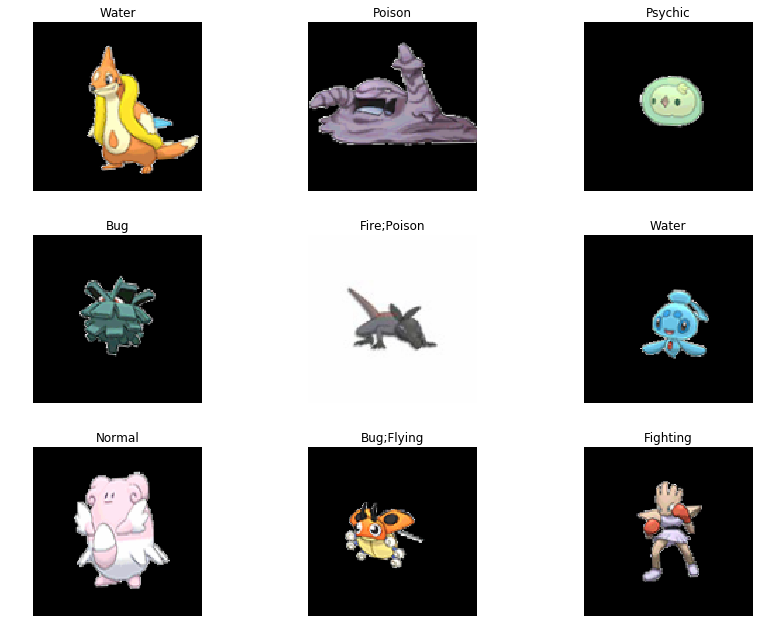

In [32]:
data.show_batch(rows=3, figsize=(12,9))

In [33]:
learn = cnn_learner(data, models.resnet18, metrics=[accuracy_thresh, fbeta])

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 46827520/46827520 [00:01<00:00, 34588535.52it/s]


In [34]:
learn.data.train_ds

LabelList (648 items)
x: ImageList
Image (3, 120, 120),Image (3, 120, 120),Image (3, 120, 120),Image (3, 120, 120),Image (3, 120, 120)
y: MultiCategoryList
Grass;Poison,Grass;Poison,Fire,Fire,Fire;Flying
Path: /root/.fastai/data/pokemon/images

In [35]:
learn.data.valid_ds

LabelList (161 items)
x: ImageList
Image (3, 120, 120),Image (3, 120, 120),Image (3, 120, 120),Image (3, 120, 120),Image (3, 120, 120)
y: MultiCategoryList
Rock;Ice,Fighting,Dark;Fire,Rock;Psychic,Fighting
Path: /root/.fastai/data/pokemon/images

In [48]:
classes = learn.data.classes
classes

['Bug',
 'Dark',
 'Dragon',
 'Electric',
 'Fairy',
 'Fighting',
 'Fire',
 'Flying',
 'Ghost',
 'Grass',
 'Ground',
 'Ice',
 'Normal',
 'Poison',
 'Psychic',
 'Rock',
 'Steel',
 'Water']

In [37]:
learn.data.c

18

TRAIN STAGE 1
_______________________________________________

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


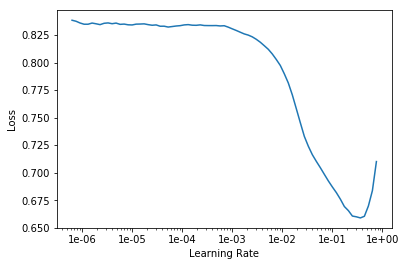

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
lr = 0.01

In [0]:
learn.fit_one_cycle(4, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.793798,0.680839,0.598689,0.298767,00:02
1,0.605208,0.275945,0.917874,0.185133,00:02
2,0.469855,0.298995,0.917529,0.099724,00:02
3,0.398112,0.292489,0.918220,0.100414,00:02


In [0]:
learn.save(base_dir + 'stage-1-pokemon')

In [0]:
learn.load(base_dir + 'stage-1-pokemon')

TRAIN STAGE 2

_______________________________________________

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


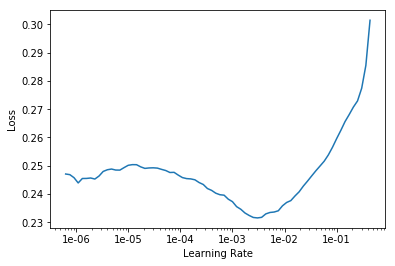

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(4, slice(1e-4, lr/10))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.250145,0.281967,0.917874,0.174460,00:02
1,0.231034,0.267763,0.915804,0.219946,00:02
2,0.211194,0.262186,0.919600,0.246704,00:02
3,0.194646,0.258064,0.918910,0.284285,00:02


In [0]:
learn.save(base_dir + 'stage-2-pokemon')

In [0]:
learn.load(base_dir + 'stage-2-pokemon')

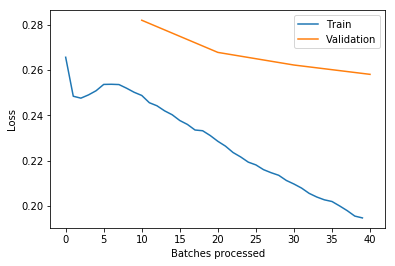

In [0]:
learn.recorder.plot_losses()

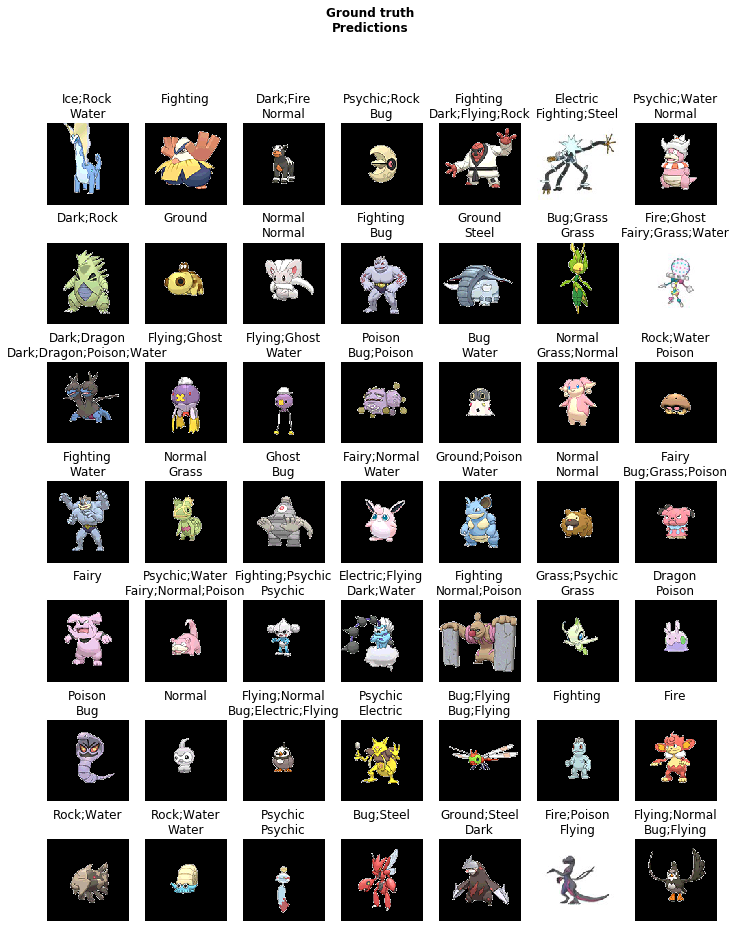

In [0]:
learn.show_results(rows=7, figsize=(12,15), thresh=0.2)

EXPORT

_______________________________________________

In [0]:
learn.path = Path(base_dir)
learn.path

PosixPath('/content/gdrive/My Drive/Colab Notebooks/fast.ai Lesson 3')

In [0]:
learn.export()

INFERENCE

_______________________________________________

In [0]:
inference_model = load_learner(base_dir)

(MultiCategory Grass;Poison;Psychic,
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.]),
 tensor([0.1315, 0.0207, 0.0110, 0.0191, 0.0491, 0.0143, 0.0106, 0.0295, 0.0211,
         0.6083, 0.0234, 0.0683, 0.0359, 0.3732, 0.2043, 0.0110, 0.0208, 0.0989]))

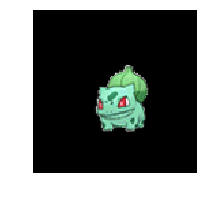

In [66]:
img = data.train_ds[0][0]
img.show()


pred_class, pred_idx, outputs = inference_model.predict(img, thresh=0.2)
inference_model.predict(img, thresh=0.2)


(MultiCategory Fire,
 tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 tensor([0.0329, 0.0025, 0.0131, 0.0388, 0.0011, 0.0193, 0.5117, 0.0125, 0.0040,
         0.1053, 0.0170, 0.0046, 0.0825, 0.0224, 0.0045, 0.0026, 0.0067, 0.0675]))

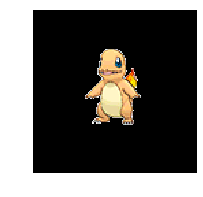

In [45]:
img = data.train_ds[2][0]
img.show()

inference_model.predict(img, thresh=0.2)

(MultiCategory Psychic,
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 tensor([0.0951, 0.0415, 0.0551, 0.0906, 0.1955, 0.1526, 0.0219, 0.0446, 0.1074,
         0.1449, 0.0719, 0.1236, 0.1587, 0.0935, 0.2107, 0.1124, 0.1884, 0.1258]))

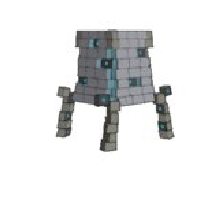

In [46]:
img = open_image(path/'images'/'stakataka.jpg')
img.show()

inference_model.predict(img, thresh=0.2)

In [0]:
def editedPreds(pred_class, outputs, classes):
  
  # return pokemon type(s) from output tensor using thresh=0.2
  # if >=2 types are prediced, choose first two types from pred_class
  # if 1 type is predicted, choose that one type
  # if 0 types are predicted, choose top two values from output tensor
  # map between classes and output tensor
  
  mapping = sorted(zip(classes, outputs), key=lambda x: x[1], reverse=True)
  
  preds = str(pred_class).split(';')
  
  if len(preds) >= 2:
    # return the two highest type predictions
    return preds[0] + ';' + preds[1]
  
  elif len(preds) == 1 and preds[0].isalnum():
    # return the one type prediction
    return preds[0]
  
  else:
    # map the classes to the outputs, sort by output values
    # return the top two type predictions
    mapping = sorted(zip(classes, outputs), key=lambda x: x[1], reverse=True)
    return mapping[0][0] + ';' + mapping[1][0]
  

In [0]:
classes = learn.data.classes

In [119]:
# make a for loop to predict every pokemon
for pokemon in fnames:
  img = open_image(path/'images'/pokemon)
  print(pokemon)
  pred_class, pred_idx, outputs = inference_model.predict(img, thresh=0.2)
  
  row = df.loc[df['Name'] == pokemon]
  actual = row['labels'].tolist()
  actual = actual[0].replace(' ', ';')
  
  print("Actual: ", actual)
  print("Predicted: ", pred_class)
  print("Edited: ", editedPreds(pred_class, outputs, classes))
  
  print(outputs)
  print('\n')

mawile.png
Actual:  Steel;Fairy
Predicted:  Steel
Edited:  Steel
tensor([0.1485, 0.0517, 0.0030, 0.0338, 0.0498, 0.0191, 0.0178, 0.0600, 0.1311,
        0.0192, 0.0962, 0.0122, 0.0420, 0.0174, 0.1686, 0.0296, 0.7359, 0.0090])


pignite.png
Actual:  Fire;Fighting
Predicted:  Fire
Edited:  Fire
tensor([0.1581, 0.0113, 0.0083, 0.0188, 0.0018, 0.0550, 0.9513, 0.0067, 0.0057,
        0.0061, 0.1636, 0.0039, 0.0443, 0.0090, 0.0091, 0.0491, 0.0203, 0.0555])


shellder.png
Actual:  Water
Predicted:  Water
Edited:  Water
tensor([0.0776, 0.0509, 0.0146, 0.0473, 0.0466, 0.0291, 0.0304, 0.0258, 0.0897,
        0.1120, 0.0477, 0.0795, 0.0909, 0.1694, 0.0742, 0.0392, 0.0614, 0.2657])


weavile.png
Actual:  Dark;Ice
Predicted:  Psychic;Water
Edited:  Psychic;Water
tensor([0.0605, 0.1390, 0.0255, 0.0214, 0.0984, 0.0400, 0.0240, 0.0564, 0.0322,
        0.0516, 0.0206, 0.1270, 0.0143, 0.1440, 0.2464, 0.0356, 0.0332, 0.2394])


remoraid.png
Actual:  Water
Predicted:  Water
Edited:  Water
tensor([0.1125, 

In [121]:
classes

['Bug',
 'Dark',
 'Dragon',
 'Electric',
 'Fairy',
 'Fighting',
 'Fire',
 'Flying',
 'Ghost',
 'Grass',
 'Ground',
 'Ice',
 'Normal',
 'Poison',
 'Psychic',
 'Rock',
 'Steel',
 'Water']